# P-285 Combined - Cycle Power Plant

## Business Objective:
### A combined-cycle power plant comprises gas turbines, steam turbines, and heat recovery steam generators. In this type of plant, the electricity is generated by gas and steam turbines combined in one cycle. Then, it is transferred from one turbine to another. We have to model the energy generated as a function of exhaust vacuum and ambient variables and use that model to improve the plant's performance.

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

### Read the dataset

In [ ]:
ccpp = pd.read_csv("CCPP.csv")
ccpp

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


## Exploratory Data Analysis

In [ ]:
ccpp.shape

(9568, 5)

In [ ]:
ccpp.dtypes

temperature          float64
exhaust_vacuum       float64
amb_pressure         float64
r_humidity           float64
energy_production    float64
dtype: object

#### Summary of dataset

In [ ]:
ccpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


#### Find & drop Duplicates

In [ ]:
ccpp[ccpp.duplicated()].shape

(41, 5)

In [ ]:
ccpp[ccpp.duplicated()]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24
3747,11.61,41.17,1019.57,58.82,476.81
4292,12.27,41.17,1019.41,58.10,475.13
4528,24.63,59.57,1010.45,85.36,440.67
5065,8.57,41.17,1020.18,72.47,484.20
5564,11.82,41.17,1019.50,55.74,475.61


In [ ]:
ccpp_new = ccpp.drop_duplicates().reset_index(drop=True)
ccpp_new.shape

(9527, 5)

#### Finding null values

In [ ]:
ccpp.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

There is no null values found in the dataset

#### Statistical summary

In [ ]:
ccpp_new.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9527.000000,9527.000000,9527.000000,9527.000000,9527.00000
mean,19.658225,54.293421,1013.237084,73.334951,454.33591
std,7.444397,12.686309,5.940526,14.607513,17.03908
min,1.810000,25.360000,992.890000,25.560000,420.26000
25%,13.530000,41.740000,1009.085000,63.375000,439.75000
50%,20.350000,52.080000,1012.920000,75.000000,451.52000
75%,25.710000,66.510000,1017.200000,84.850000,468.36500
max,37.110000,81.560000,1033.300000,100.160000,495.76000


temperaure range between 1.81-37.11
exhaust_vacuum range between 25.36-81.56
amb_pressure range between 992.89-1033.30
r_humidity range between 25.56-100.16
energy_production between 420.26-495.76

## Correlation Matrix

In [ ]:
ccpp_new.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.843689,-0.508222,-0.543947,-0.947908
exhaust_vacuum,0.843689,1.000000,-0.415718,-0.312214,-0.869900
amb_pressure,-0.508222,-0.415718,1.000000,0.101631,0.518687
r_humidity,-0.543947,-0.312214,0.101631,1.000000,0.391175
energy_production,-0.947908,-0.869900,0.518687,0.391175,1.000000


In [ ]:
# Strong Negative correlation between temperature & exhaust_vaccum against our target variable energy_production
# moderate correlation between amb_pressure against target variable
# weak correlation between r_humidity & energy production.

### HeatMap of correlation matrix

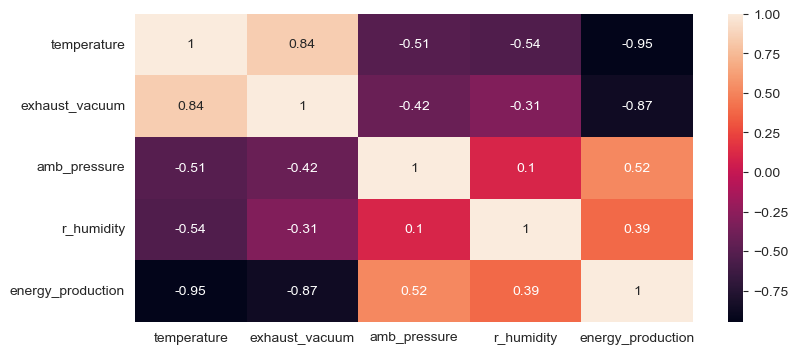

In [ ]:
plt.figure(figsize = (9, 4))
sns.heatmap(ccpp_new.corr(),annot=True)
plt.show()

## Data Visualization

### Scatter Plot

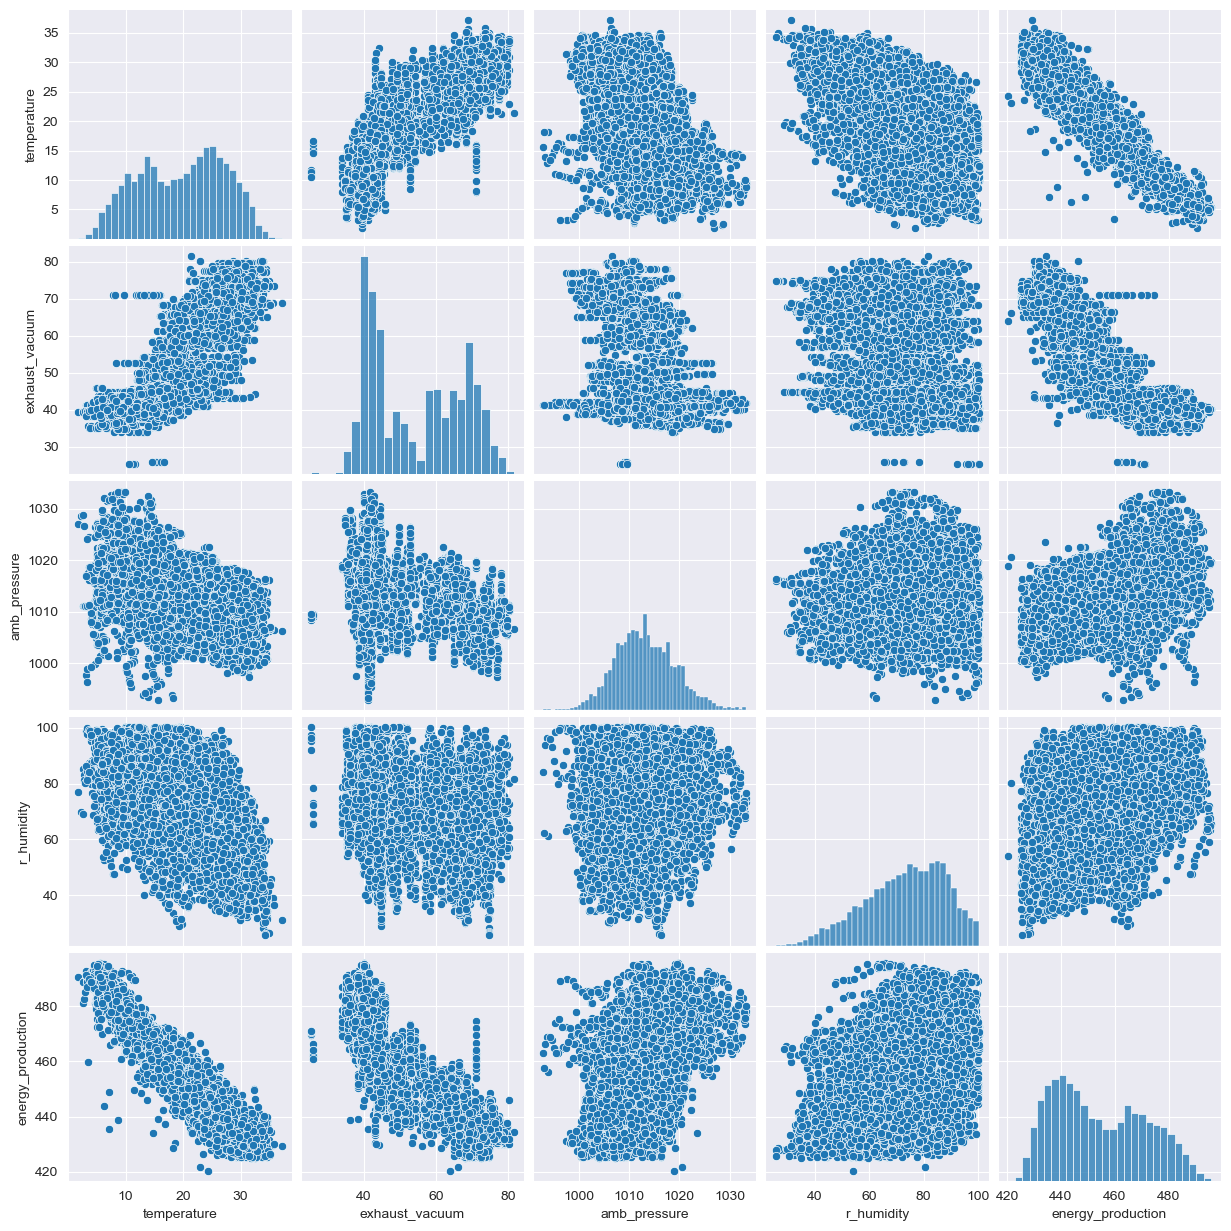

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(ccpp)
plt.show()

In [ ]:
ncolumns = ccpp.columns
ncolumns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

### Histogram

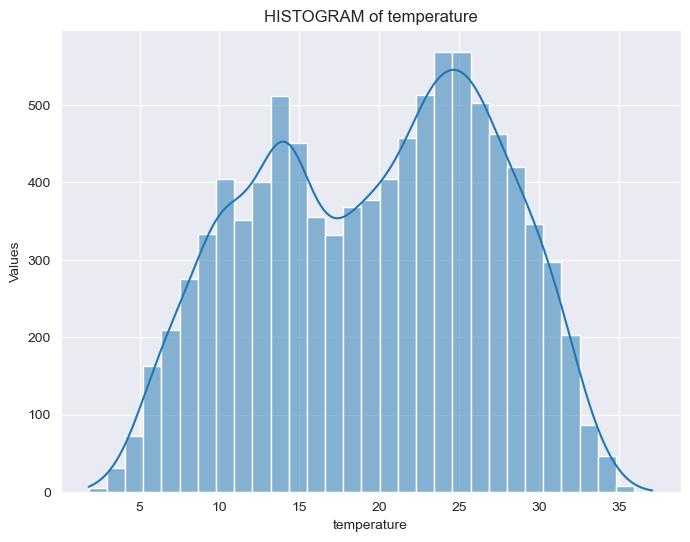

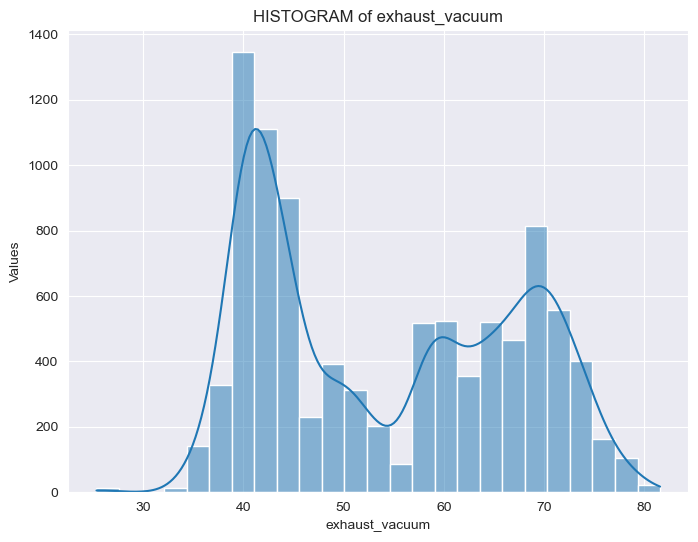

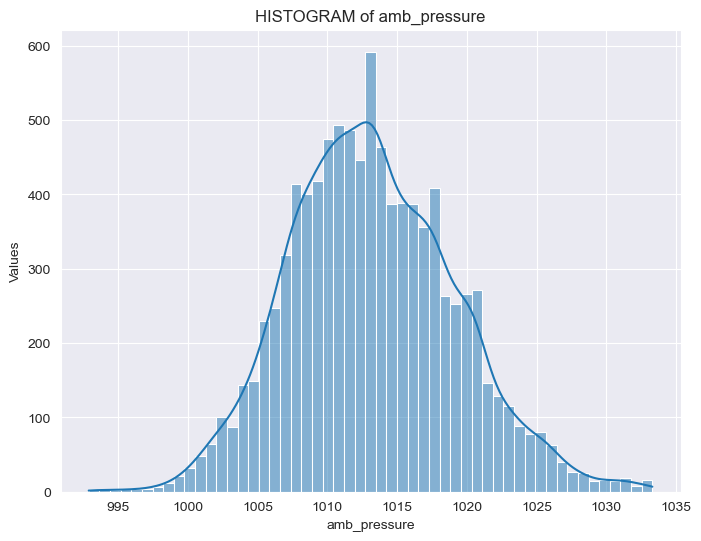

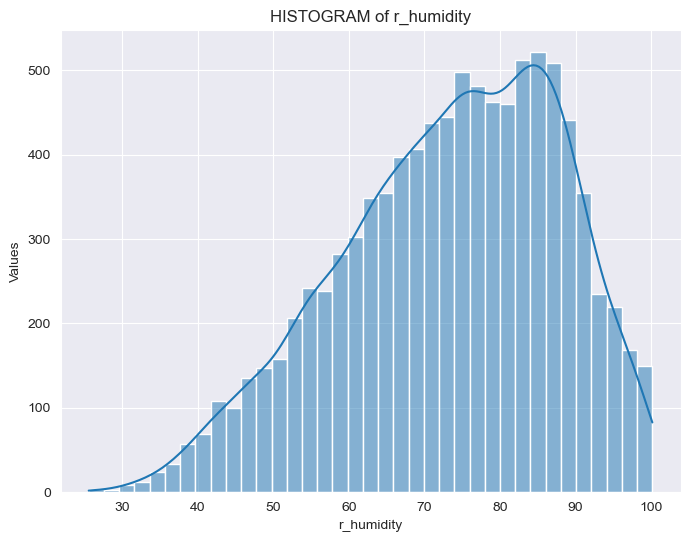

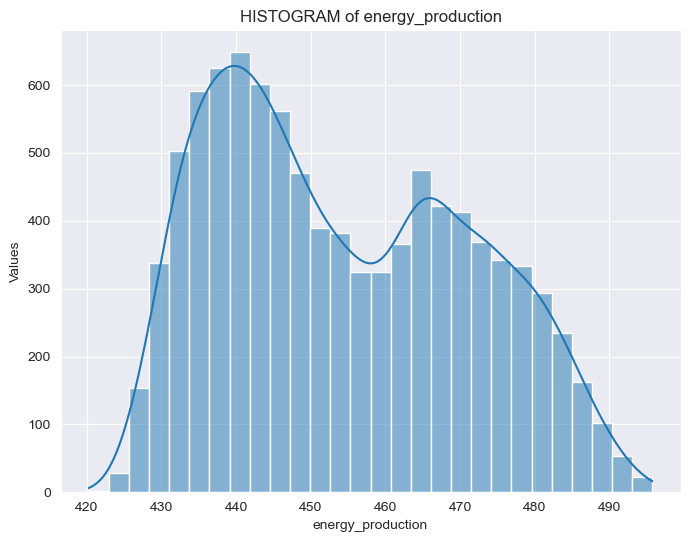

In [ ]:
col=0
for col in ncolumns:
    plt.figure(figsize=(8,6))
    sns.histplot(x=ccpp_new[col], kde=True)
    plt.title(f'HISTOGRAM of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.show()

As per Histplot amb_pressure following normal distribution

### Skewness Detection

In [ ]:
ccpp_new.skew()

temperature         -0.136107
exhaust_vacuum       0.196819
amb_pressure         0.273846
r_humidity          -0.435138
energy_production    0.305791
dtype: float64

### Box Plot

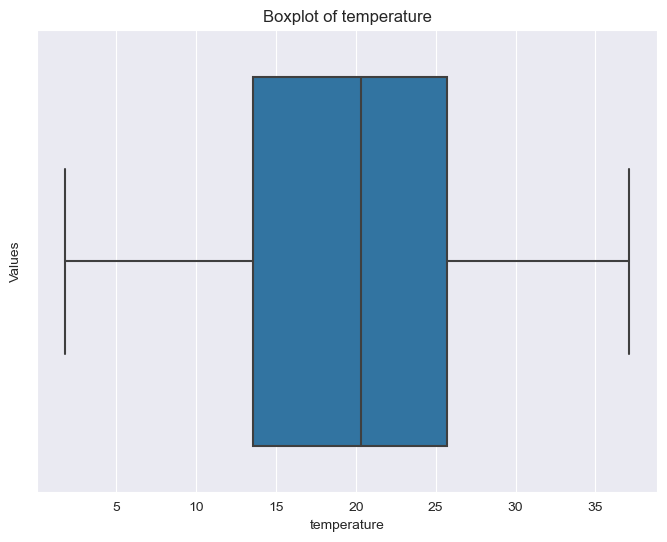

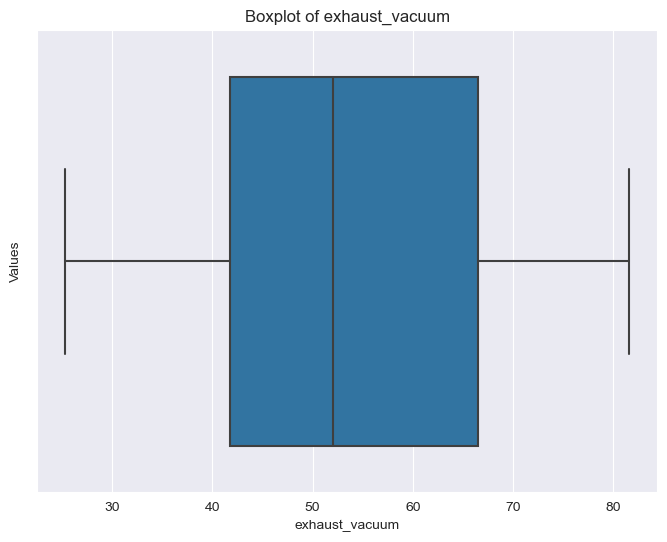

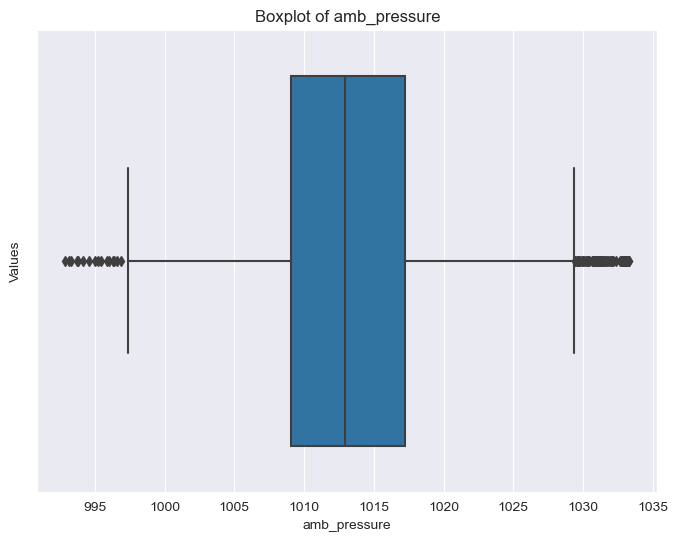

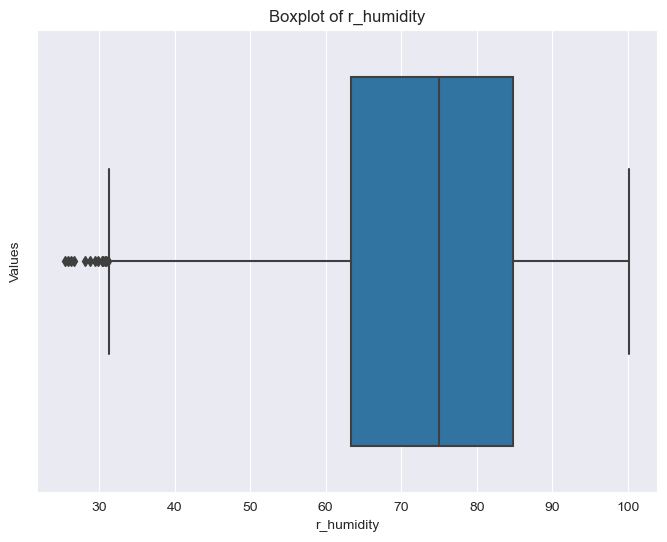

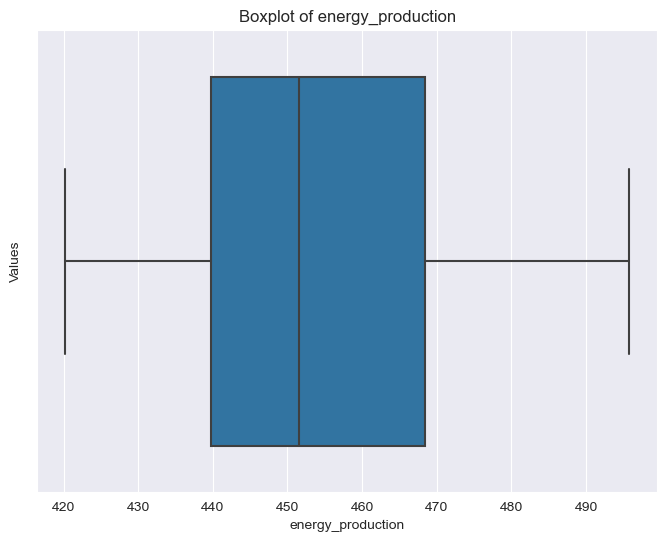

In [ ]:
for col in ncolumns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=ccpp_new[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.show()

There is outliers in amb_pressure and r_humidity

### Outliers Removal

In [ ]:
ccpp_new.drop(ccpp_new.index[ccpp_new['amb_pressure']>1029], inplace=True)
ccpp_new.drop(ccpp_new.index[ccpp_new['amb_pressure']<997], inplace=True)
ccpp_new.drop(ccpp_new.index[ccpp_new['r_humidity']<31], inplace=True)

In [ ]:
ccpp_new.shape

(9416, 5)

final dataset has 9416 rows and 5 columns after removing outliers and duplicates.

### Box Plot After removel of outliers

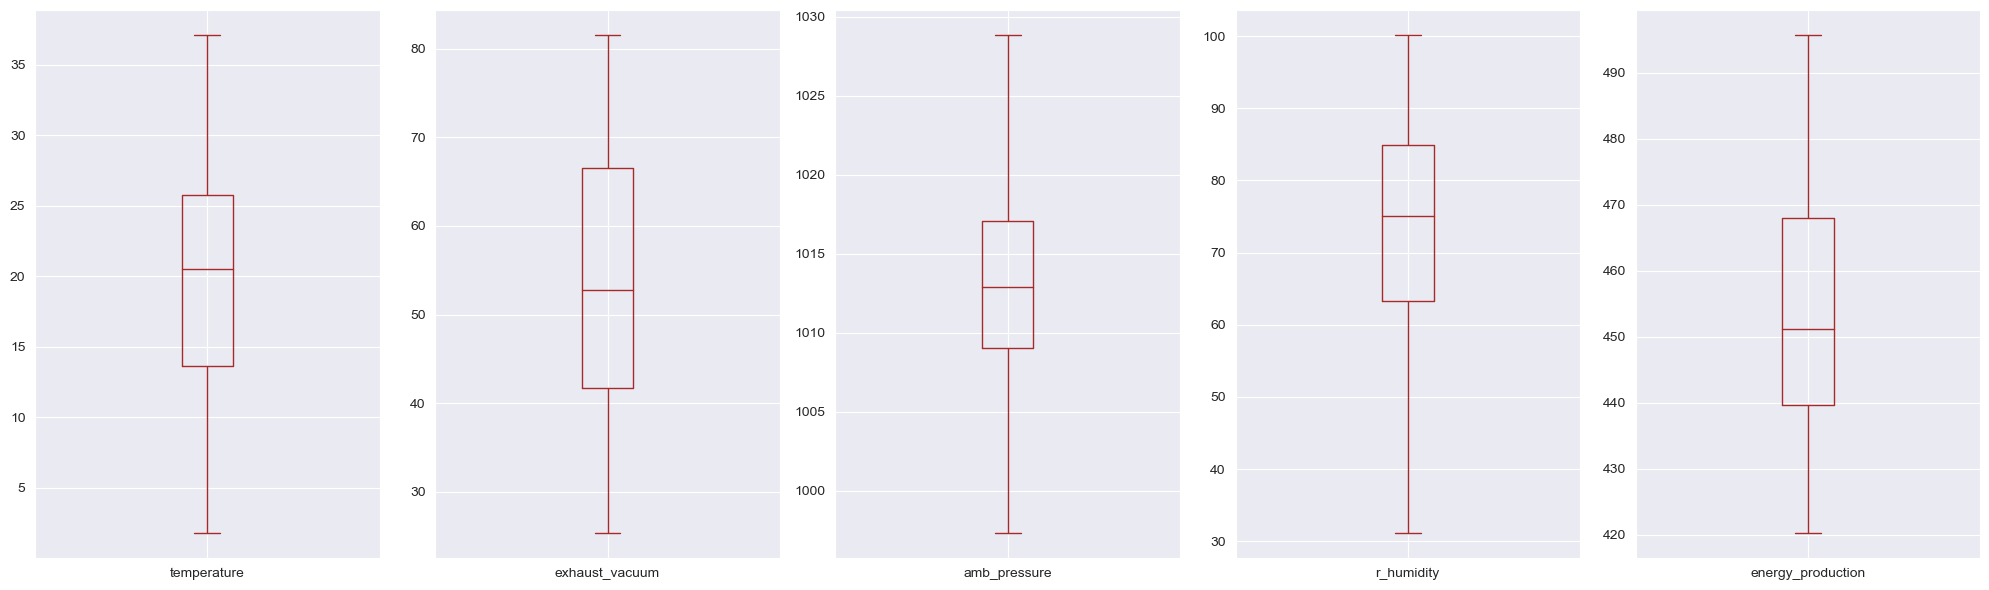

In [ ]:
ccpp_new.plot(kind='box', subplots=True, figsize=(20,6),color="Brown")
plt.tight_layout()

### Testing for Linearity

In [ ]:
# The initial observation of the data suggests that we will need to use a linear regression model to predict the power output.
# We will put that finding to a test.

# Using the statsmodels library, we obtain the following relationship between variables and the output (PE):

In [ ]:
# Build the model
import statsmodels.formula.api as smf
model = smf.ols('energy_production~temperature+exhaust_vacuum+amb_pressure+r_humidity',data=ccpp_new).fit()
model.params

Intercept         443.040546
temperature        -1.970462
exhaust_vacuum     -0.236374
amb_pressure        0.073497
r_humidity         -0.158025
dtype: float64

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.021e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:13:38   Log-Likelihood:                -27665.
No. Observations:                9416   AIC:                         5.534e+04
Df Residuals:                    9411   BIC:                         5.538e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        443.0405     10.262     43.172      0.000     422.924     463.157
temperature       -1.9705      0.015   -127.815      0.000      -2.001      -1.940
exhaust_vacuum    -0.2364      0.007    -32.233      0.000      -0.251      -0.222
amb_pressure       0.0735      0.010      7.375      0.000       0.054       0.093
r_humidity        -0.1580      0.004    -37.465      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      885.899   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4065.447
Skew:                          -0.357   Prob(JB):                         0.00
Kurtosis:                       6.139   Cond. No.                     2.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The above values tell us that we can use the following formula to predict the output power using AT, V, AP, and RH:
### PE = 443.040546 - 1.970462 * AT - 0.236374 * V + 0.073497 * AP - 0.158025 * RH
### To test if the model is able to predict the output, we will use the first entry of the data set:

In [ ]:
# 9.59 	38.56 	1017.01 	60.10

In [ ]:
model.predict(pd.DataFrame({'temperature':[9.59],'exhaust_vacuum':[38.56],'amb_pressure':[1017.01],'r_humidity':[60.10]}))

0    480.279045
dtype: float64

In [ ]:
# The actual observed value is 481.30, which is not very far from the predicted value from the formula derived above.

### Residual Plots

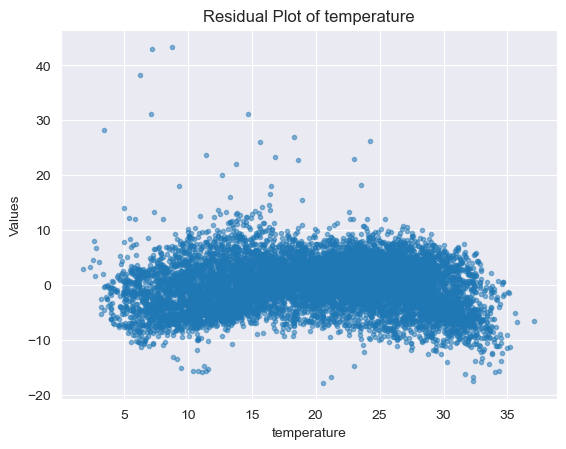

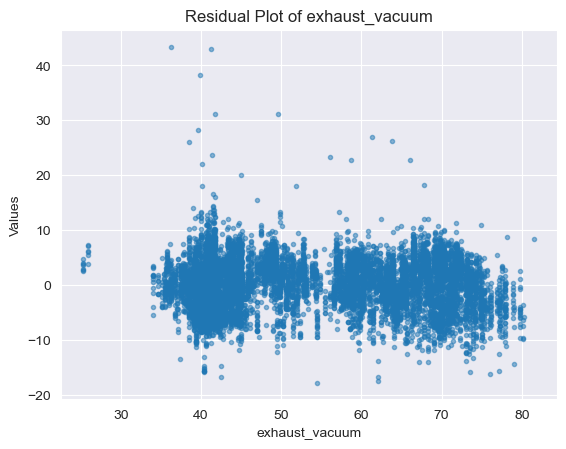

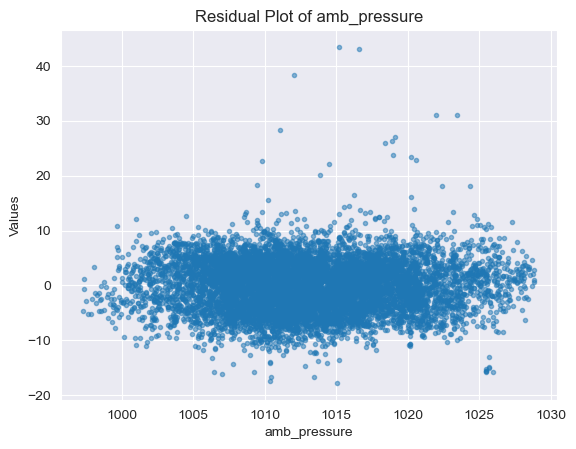

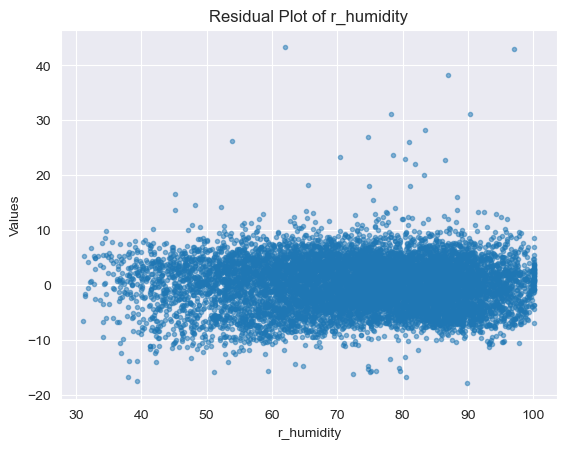

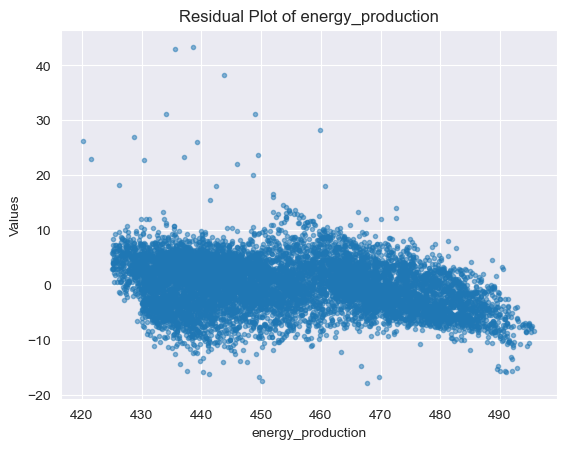

In [ ]:
residuals = model.predict(ccpp_new) - ccpp_new.energy_production
for col in ncolumns:
    plt.plot(ccpp_new[col], residuals, ".", alpha=0.5)
    plt.title(f'Residual Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.show()

In [ ]:
# As expected, all of the independent variables in the data set are showing a random pattern.
# Some residuals are negative while others are positive; there is no non-random shapes such as U-shaped or inverted U.
# We can conclude at this point that for our predictions, linear regression is a good candidate.

### Making Predictions Using Different Machine Learning Models

### Normalizing our data

In [ ]:
from sklearn import preprocessing

In [ ]:
ccpp_norm=preprocessing.normalize(ccpp_new)
ccpp_norm=pd.DataFrame(ccpp_norm)

In [ ]:
ccpp_norm.columns = ccpp_new.columns
ccpp_norm

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,0.008506,0.034201,0.902042,0.053306,0.426891
1,0.010695,0.037611,0.905823,0.084096,0.413382
2,0.012283,0.039923,0.907240,0.072346,0.412235
3,0.012205,0.048305,0.905506,0.070349,0.415484
4,0.013427,0.044025,0.907975,0.066516,0.411142
...,...,...,...,...,...
9411,0.015421,0.044810,0.906771,0.073784,0.412404
9412,0.022222,0.058713,0.912432,0.047445,0.401592
9413,0.027765,0.051297,0.916848,0.051297,0.391607
9414,0.020732,0.059538,0.919990,0.072374,0.380008


### Data Split

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define your target variable and features

X = ccpp_norm.drop('energy_production', axis=1)
y = ccpp_norm['energy_production']

# Split the data into training and testing sets (e.g., 80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7532, 4), (7532,), (1884, 4), (1884,))

### Feature Selection

In [ ]:
# Feature selection using SelectKBest and F-statistic

selector = SelectKBest(score_func=f_regression, k=4) # Adjust k as needed
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

We finalized that all the features are significant for predicting our target variable.

### Train a regression model

#### Initialize and train a linear regression model

In [ ]:

linear = LinearRegression()
linear.fit(X_train_selected, y_train)

# Predict on the test set
Li_pred = linear.predict(X_test_selected)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


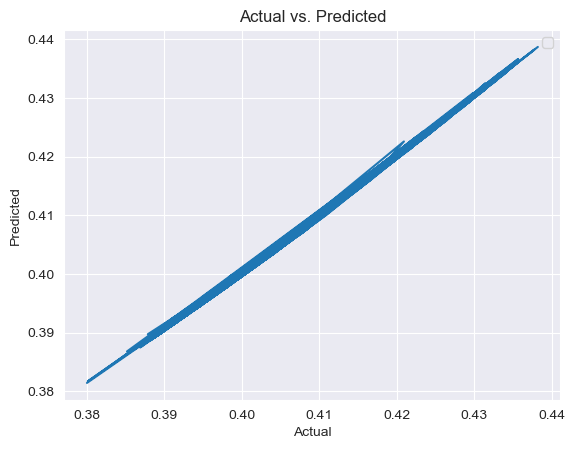

In [ ]:
plt.plot(y_test, Li_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.grid(True)
legend=plt.legend()
plt.show()

#### Decision Tree Regression

In [ ]:
# Define hyperparameters for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Build a Decision Tree Regression model
dt_model = DecisionTreeRegressor()

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build a Decision Tree Regression model with the best hyperparameters
best_dt_model = DecisionTreeRegressor(**best_params)

# Train the best model
best_dt_model.fit(X_train_selected, y_train)

# Make predictions
dt_pred = best_dt_model.predict(X_test_selected)

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5}


#### Random Forest Regression

In [ ]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Build a Random Forest Regression model
rf_model = RandomForestRegressor()

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build a Random Forest Regression model with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params)

# Train the best model
best_rf_model.fit(X_train_selected, y_train)

# Make predictions
rf_pred = best_rf_model.predict(X_test_selected)

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


#### Ridge

In [ ]:
# Define hyperparameters for tuning
param_grid = {
    'alpha': [0.1, 1, 10],
}

# Build a Ridge Regression model
ridge_model = Ridge()

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build a Ridge Regression model with the best hyperparameters
best_ridge_model = Ridge(**best_params)

# Train the best model
best_ridge_model.fit(X_train_selected, y_train)

# Make predictions with the best models
ridge_pred = best_ridge_model.predict(X_test_selected)

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 0.1}


#### Lasso

In [ ]:
# Define hyperparameters for tuning
param_grid = {
    'alpha': [0.1, 1, 10],
}

# Build a Lasso Regression model
lasso_model = Lasso()

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build a Lasso Regression model with the best hyperparameters
best_lasso_model = Lasso(**best_params)

# Train the best model
best_lasso_model.fit(X_train_selected, y_train)

# Make predictions
lasso_pred = best_lasso_model.predict(X_test_selected)

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 0.1}


#### ElasticNet

In [ ]:
# Define hyperparameters for tuning
param_grid = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9],
}

# Build an ElasticNet Regression model
elasticnet_model = ElasticNet()

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(elasticnet_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build an ElasticNet Regression model with the best hyperparameters
best_elasticnet_model = ElasticNet(**best_params)

# Train the best model
best_elasticnet_model.fit(X_train_selected, y_train)

# Make predictions
elasticnet_pred = best_elasticnet_model.predict(X_test_selected)

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.1}


#### XGBoost

In [ ]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Build an XGBoost Regression model
xgb_model = xgb.XGBRegressor()

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build an XGBoost Regression model with the best hyperparameters
best_xgb_model = xgb.XGBRegressor(**best_params)

# Train the best model
best_xgb_model.fit(X_train_selected, y_train)

# Make predictions
xgb_pred = best_xgb_model.predict(X_test_selected)

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


#### Gradient Boosting Regression

In [ ]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
gbr_model = GradientBoostingRegressor(random_state=42)

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(gbr_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build a Gradient Boosting Regression model with the best hyperparameters
best_gbr_model = GradientBoostingRegressor(**best_params, random_state=42)

# Train the best model
best_gbr_model.fit(X_train_selected, y_train)

# Make predictions
gbr_pred = best_gbr_model.predict(X_test_selected)
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


#### Support Vector Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Define hyperparameters for tuning
param_grid = {
    'kernel': ['linear', 'rbf','poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
}

# Build a Support Vector Regression (SVR) model
svr_model = SVR()

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build an SVR model with the best hyperparameters
best_svr_model = SVR(**best_params)

# Train the best model
best_svr_model.fit(X_train_scaled, y_train)

# Make predictions
svr_pred = best_svr_model.predict(X_test_scaled)
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}


#### AdaBoost Regression

In [ ]:
# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
}
# Build an AdaBoost Regression model
adaboost_model = AdaBoostRegressor(base_estimator=None, random_state=42)

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build an AdaBoost Regression model with the best hyperparameters
best_adaboost_model = AdaBoostRegressor(**best_params, random_state=42)

# Train the best model
best_adaboost_model.fit(X_train_selected, y_train)

# Make predictions
adaboost_pred = best_adaboost_model.predict(X_test_selected)

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.2, 'n_estimators': 200}


#### KNN Regression

In [ ]:
# Define hyperparameters for tuning
param_grid = {
    'n_neighbors': [3, 5, 7],  # You can adjust the number of neighbors (k) as needed
    'weights': ['uniform', 'distance'],
}
# Build a KNN Regression model
knn_model = KNeighborsRegressor()

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Train the model with hyperparameter tuning
grid_search.fit(X_train_selected, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Build a KNN Regression model with the best hyperparameters
best_knn_model = KNeighborsRegressor(**best_params)

# Train the best model
best_knn_model.fit(X_train_selected, y_train)

# Make predictions
knn_pred = best_knn_model.predict(X_test_selected)

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}


### Model Evalution

In [ ]:
results=[]
def evaluate_model(model, y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    results.append({
        "Model Name": model_name,
        "Mean Squared Error": mse,
        "R-squared": r2,
        "Mean Absolute Error": mae}
        )


In [ ]:
evaluate_model(linear, y_test, Li_pred, "Linear")
evaluate_model(best_dt_model, y_test, dt_pred, "DecisionTree")
evaluate_model(best_rf_model, y_test, rf_pred, "Random Forest")
evaluate_model(best_ridge_model, y_test, ridge_pred, "Ridge")
evaluate_model(best_lasso_model, y_test, lasso_pred, "Lasso")
evaluate_model(best_elasticnet_model, y_test, elasticnet_pred, "Elasticnet")
evaluate_model(best_xgb_model, y_test, xgb_pred, "XGBoost")
evaluate_model(best_gbr_model, y_test, gbr_pred, "GBR")
evaluate_model(best_svr_model, y_test, svr_pred, "SVR")
evaluate_model(best_adaboost_model, y_test, adaboost_pred, "AdaBoost")
evaluate_model(best_knn_model, y_test, knn_pred, "KNN")

In [ ]:
from tabulate import tabulate
# Print the results in a table format
table = tabulate(results, headers="keys", tablefmt="fancy_grid")
print(table)

╒═══════════════╤══════════════════════╤═════════════╤═══════════════════════╕
│ Model Name    │   Mean Squared Error │   R-squared │   Mean Absolute Error │
╞═══════════════╪══════════════════════╪═════════════╪═══════════════════════╡
│ Linear        │          1.40716e-07 │  0.999008   │           0.000291153 │
├───────────────┼──────────────────────┼─────────────┼───────────────────────┤
│ DecisionTree  │          2.8402e-07  │  0.997997   │           0.000380482 │
├───────────────┼──────────────────────┼─────────────┼───────────────────────┤
│ Random Forest │          1.04044e-07 │  0.999266   │           0.000185098 │
├───────────────┼──────────────────────┼─────────────┼───────────────────────┤
│ Ridge         │          8.75697e-06 │  0.938247   │           0.002361    │
├───────────────┼──────────────────────┼─────────────┼───────────────────────┤
│ Lasso         │          0.000141809 │ -2.3696e-05 │           0.0102863   │
├───────────────┼──────────────────────┼────────────

#### Visualize feature importances

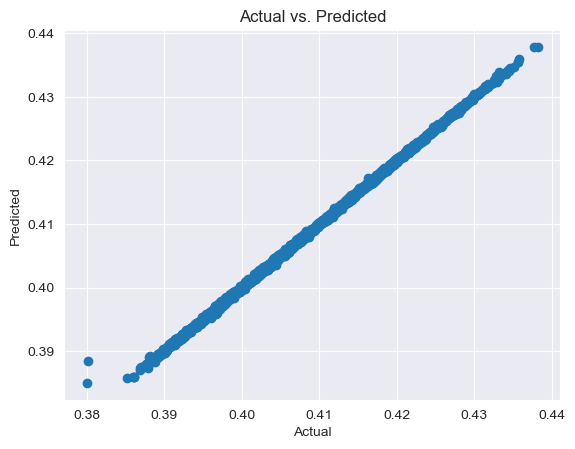

In [ ]:
# Plot predicted vs. actual values
plt.scatter(y_test, gbr_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted")
plt.show()

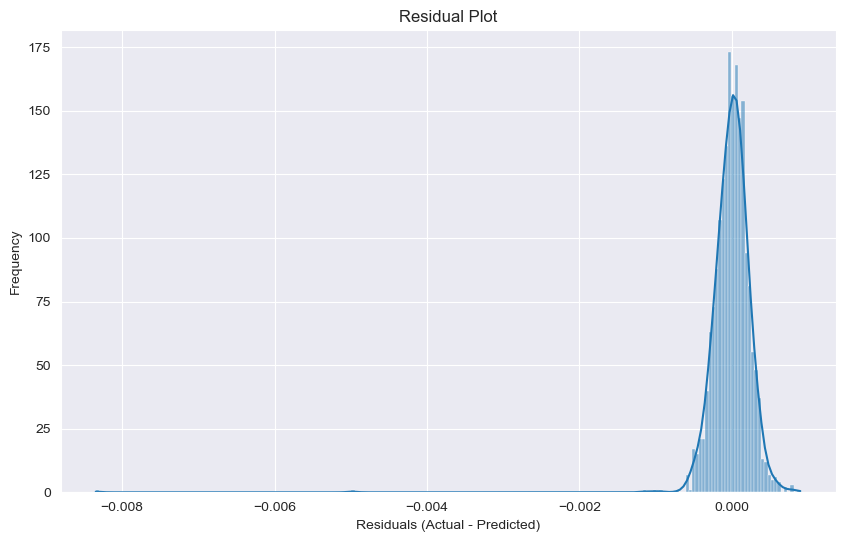

In [ ]:
# Residual plot (Difference between actual and predicted values)
residuals = y_test - gbr_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

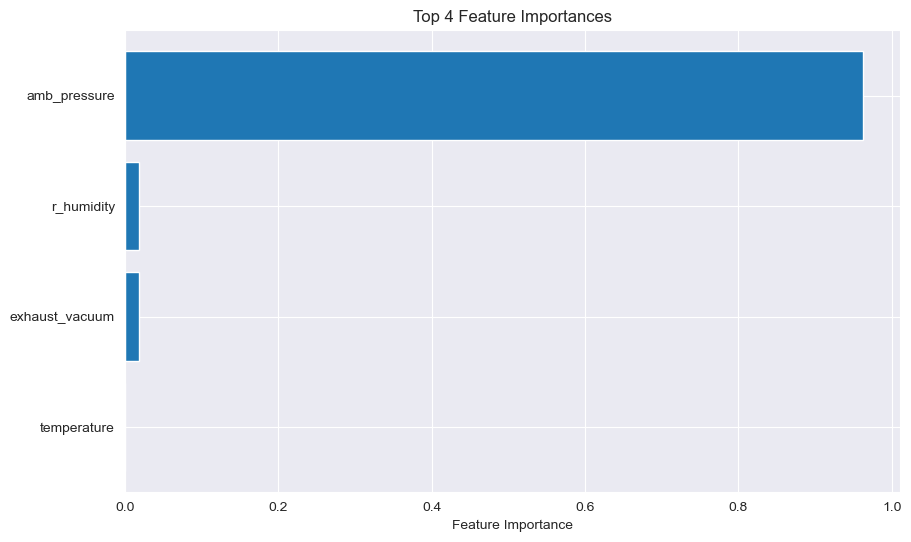

In [ ]:
feature_importances = best_gbr_model.feature_importances_
feature_names = ccpp_norm.columns[:-1]  # Excluding the target column

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]
k=4
plt.figure(figsize=(10, 6))
plt.barh(range(k), sorted_importances[:k], align='center')
plt.yticks(range(k), sorted_feature_names[:k])
plt.xlabel('Feature Importance')
plt.title(f'Top {k} Feature Importances')
plt.gca().invert_yaxis()
plt.show()